# Q10

In [2]:
from liblinear.liblinearutil import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random 
import math
# c = 1/(2*lambda)
lambdas = [1e-6, 1e-4, 1e-2, 1e-0, 1e2]
c_ = [1/(2*x) for x in lambdas]

def get_orig_data():
    # Read the training data
    data = pd.read_csv('hw4_train.dat', header=None, sep=' ')

    X_train = data.iloc[:, :-1]
    y_train = data.iloc[:, -1]
    X_train = np.array(X_train)
    y_train = np.array(y_train)

    for i in range(6):
        for j in range(i, 6):
            X_train = np.concatenate((X_train, (X_train[:, i] * X_train[:, j]).reshape(-1,1)), axis=1)

    for i in range(6):
        for j in range(i, 6):
            for k in range(j, 6):
                X_train = np.concatenate((X_train, (X_train[:, i] * X_train[:, j] * X_train[:, k]).reshape(-1,1)), axis=1)

    X_train = np.concatenate((np.ones((X_train.shape[0], 1)), X_train), axis=1)
    data = np.concatenate((X_train, y_train.reshape(-1,1)), axis=1)
    return data

In [6]:
best_model = None
best_acc = 0
best_lambda = 0
X_train = get_orig_data()[:, :-1]
y_train = get_orig_data()[:, -1]

for c in c_:
    print("Training with lambda:", 1/(2*c))
    model_ = train(y_train, X_train, f'-s 0 -c {c} -e 0.000001 -q')
    p_label, p_acc, p_val = predict(y_train, X_train, model_)
    if(p_acc[0] >= best_acc):
        best_acc = p_acc[0]
        best_model = model_
        best_lambda = c
    print()

print("Best lambda:", 1/(2*best_lambda))
print("Best lambda(log_10):", math.log10(1/(2*best_lambda)))
print("Best accuracy:", best_acc)


Training with lambda: 1e-06
(200, 84) (200,)
Accuracy = 96% (192/200) (classification)

Training with lambda: 0.0001
(200, 84) (200,)
Accuracy = 92% (184/200) (classification)

Training with lambda: 0.01
(200, 84) (200,)
Accuracy = 91% (182/200) (classification)

Training with lambda: 1.0
(200, 84) (200,)
Accuracy = 87.5% (175/200) (classification)

Training with lambda: 100.0
(200, 84) (200,)
Accuracy = 80.5% (161/200) (classification)

Best lambda: 1e-06
Best lambda(log_10): -6.0
Best accuracy: 96.0


# Q11

1e-6 count 13
1e-4 count 27
1e-2 count 49
1e0 count 34
1e2 count 5


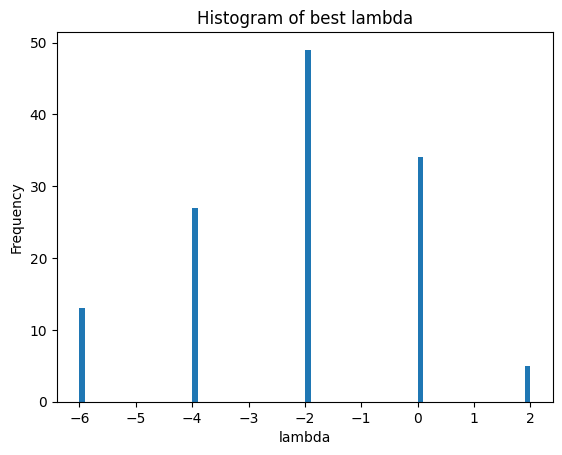

In [11]:
def get_data(random_state=1126):
    data = get_orig_data()

    random.seed(random_state)
    random.shuffle(data)
    X_train = data[:120, :-1]
    y_train = data[:120, -1]
    X_train = np.array(X_train)
    y_train = np.array(y_train)

    X_val = data[120:, :-1]
    y_val = data[120:, -1]
    X_val = np.array(X_val)
    y_val = np.array(y_val)

    return X_train, y_train, X_val, y_val


best_lambda_list = []
for i in range(128, 128*2):
    X_train120, y_train120, X_val80, y_val80 = get_data(i)
    best_model = None
    best_acc = 0
    best_lambda = 0

    for c in c_:
        model_ = train(y_train120, X_train120, f'-s 0 -c {c} -e 0.000001 -q')
        p_label, p_acc, p_val = predict(y_val80, X_val80, model_, "-q")
        if(p_acc[0] >= best_acc):
            best_acc = p_acc[0]
            best_model = model_
            best_lambda = c
    best_lambda_list.append(math.log10(1/(2*best_lambda)))

# plot historgram
plt.hist(best_lambda_list, bins=80)
plt.title("Histogram of best lambda")
plt.xlabel("lambda")
plt.ylabel("Frequency")

print("1e-6 count", best_lambda_list.count(-6))
print("1e-4 count", best_lambda_list.count(-4))
print("1e-2 count", best_lambda_list.count(-2))
print("1e0 count", best_lambda_list.count(0))
print("1e2 count", best_lambda_list.count(2))

plt.show()

# Q12

1e-6 count 0
1e-4 count 2
1e-2 count 71
1e0 count 55
1e2 count 0


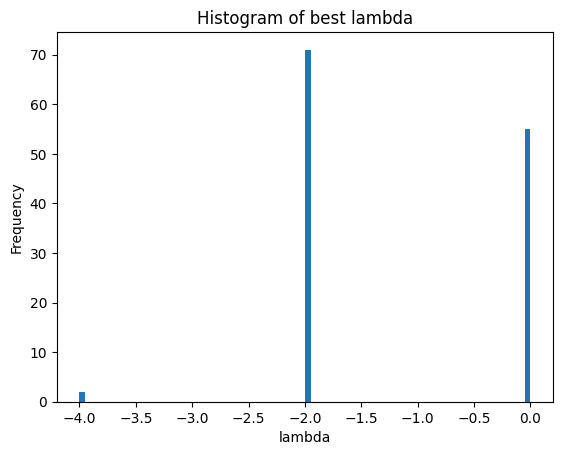

In [21]:
def get_data(random_state=1126):
    data = get_orig_data()
    np.random.seed(random_state)
    a = [x for x in range(200)]
    np.random.shuffle(a)

    folds = []
    for i in range(5):
        x_val = data[a[i*40:(i+1)*40], :-1]
        y_val = data[a[i*40:(i+1)*40], -1]
        x_train = np.concatenate((data[a[:i*40], :-1], data[a[(i+1)*40:], :-1]), axis=0)
        y_train = np.concatenate((data[a[:i*40], -1], data[a[(i+1)*40:], -1]), axis=0)
        folds.append((x_train, y_train, x_val, y_val))

    return folds

get_data()
best_lambda_list = []
for i in range(128):
    folds = get_data(i)
    best_ein = 10000000000000
    best_lambda = 0

    for c in c_:
        ein = 0
        for X_train, y_train, X_val, y_val in folds:
            model_ = train(y_train, X_train, f'-s 0 -c {c} -e 0.000001 -q')
            p_label, p_ein, p_val = predict(y_val, X_val, model_, "-q")
            ein += (1-p_ein[0])/100/5

        if(ein < best_ein):
            best_ein = ein
            best_lambda = c
            
    best_lambda_list.append(math.log10(1/(2*best_lambda)))

# plot historgram
plt.hist(best_lambda_list, bins=80)
plt.title("Histogram of best lambda")
plt.xlabel("lambda")
plt.ylabel("Frequency")

print("1e-6 count", best_lambda_list.count(-6))
print("1e-4 count", best_lambda_list.count(-4))
print("1e-2 count", best_lambda_list.count(-2))
print("1e0 count", best_lambda_list.count(0))
print("1e2 count", best_lambda_list.count(2))

plt.show()

From Q10, we get the best lamda is 1e-6.

From Q11, we can see that lamda value 1e-2 appeared the most.

From Q12, we see that lambda value with 1e-2 appeared the most.

Therefore we know from cross validation that, when lamda = 1e-2, the err would be minimize.

Moreover, the distribution for Q12 is not as wide as Q11, only three values are left.

The distribution for Q11 is more like normal distribution.

We know from this experiment, cross validation can limit the amount of "good" lamdas than simply separating our data set.

Through using folds to varify which lambda is good, we reduce the amount of good lambdas into 3 rathere than 5.

